In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
flowers = load_iris()

In [ ]:
flowers.target.shape

(150,)

In [ ]:
class NeuralNet():
  def __init__(self, input_size, hidden_size, output_size):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    self.W1 = np.random.randn(self.input_size, self.hidden_size)
    self.W2 = np.random.randn(self.hidden_size, self.output_size)

    self.b1 = np.zeros((1, self.hidden_size))
    self.b2 = np.zeros((1, self.output_size))

  def relu(self, x):
    return np.maximum(0, x)

  def relu_derivative(self, x):
    return (x > 0) * 1

  def softmax(self, x):
    exp = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    return exp

  def cross_entropy(self, output, y):
    target = self.one_hot(y)
    loss = - np.mean(target * np.log(output + 1e-8))
    return loss

  def accuracy(self, output, target):
    preds = np.argmax(output, axis=1)
    return np.sum(preds == target) / target.size

  def one_hot(self, y):
    one_hot_array = np.zeros((y.size, y.max() + 1))
    one_hot_array[np.arange(y.size), y] = 1
    return one_hot_array

  def forward(self, X):
    self.z1 = np.dot(X, self.W1) + self.b1
    self.a1 = self.relu(self.z1)
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.output = self.softmax(self.z2)
    return self.output

  def backprop(self, X, y):
    output = self.forward(X)
    target = self.one_hot(y)
    delta_out = output - target
    dW2 = np.dot(self.a1.T, delta_out)
    db2 = np.sum(delta_out, axis=0, keepdims=True)
    error_hidden = np.dot(delta_out, self.W2.T)
    delta_hidden = error_hidden * self.relu_derivative(self.z1)
    dW1 = np.dot(X.T, delta_hidden)
    db1 = np.sum(delta_hidden, axis=0, keepdims=True)
    return dW2, db2, dW1, db1

  def gradient_desc(self, dW2, db2, dW1, db1, lr):
    self.W2 -= dW2 * lr
    self.b2 -= db2 * lr
    self.W1 -= dW1 * lr
    self.b1 -= db1 * lr

  def train(self, epochs, X, y, lr):
    oks = []
    fails = []
    for i in range(epochs):
      output = self.forward(X)
      dW2, db2, dW1, db1 = self.backprop(X, y)
      ok = self.accuracy(output, y)
      oks.append(ok)
      fail = self.cross_entropy(output, y)
      fails.append(fail)
      self.gradient_desc(dW2, db2, dW1, db1, lr)
    X_axis = range(epochs)
    plt.plot(X_axis, oks, c='green')
    plt.plot(X_axis, fails, c='red')
    plt.legend(['Accuracy', 'Loss'])

In [ ]:
X = flowers.data
y = flowers.target
# normalizar los inputs
X = X / np.max(X, axis=0, keepdims=True)

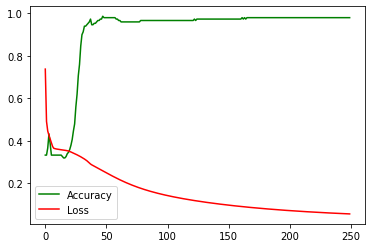

In [ ]:
nn = NeuralNet(X.shape[1], 8, y.max() + 1)
nn.train(250, X, y, 0.001)

In [ ]:
np.log(1e-8)

In [ ]:
X

In [ ]:
for i in range(X.shape[1]):
  print(f'El mínimo en {i} es {np.min(X[:, i])}')
  print(f'El máximo en {i} es {np.max(X[:, i])}')